## Problem 1

In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
cinf = pd.read_csv("CINF.csv")
dlr = pd.read_csv("DLR.csv")
el = pd.read_csv("EL.csv")
regn = pd.read_csv("REGN.csv")
wtw = pd.read_csv("WTW.csv")

companies = {"cinf": cinf, "dlr": dlr, "el": el, "regn": regn,"wtw": wtw}

In [73]:
cinf

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-03,61.689,62.053,60.711,61.309,496300,0.0,0.0
1,2017-01-04,61.560,61.746,61.228,61.536,443600,0.0,0.0
2,2017-01-05,61.503,61.964,60.840,61.285,419300,0.0,0.0
3,2017-01-06,61.342,61.511,60.970,61.301,354000,0.0,0.0
4,2017-01-09,61.034,61.083,60.258,60.266,382200,0.0,0.0
...,...,...,...,...,...,...,...,...
1505,2022-12-23,98.794,99.556,98.213,99.499,216500,0.0,0.0
1506,2022-12-27,99.699,100.337,98.918,99.480,246400,0.0,0.0
1507,2022-12-28,99.832,100.003,97.813,97.832,284400,0.0,0.0
1508,2022-12-29,98.289,99.708,98.013,99.213,383400,0.0,0.0


In [4]:
print(cinf["Date"].dtype)

object


In [5]:
for df in companies.values():
    df["Date"] = pd.to_datetime(df["Date"])

print(cinf["Date"].dtype)

datetime64[ns]


__1.1__

In [6]:
high_low_equal = []
for company,df in companies.items():
    if(df["High"]==df["Low"]).all():
        high_low_equal.append(company)

print(len(high_low_equal))

0


There are no companies, that have no difference between the High and Low columns in my data.

__1.2__

In [77]:
highest_lowest_values = pd.DataFrame(columns = ["Highest price","Lowest price"])

for company, df in companies.items():
    max = df["High"].max()
    min = df["High"].min()

    highest_lowest_values.loc[company]=[max, min]

highest_lowest_values


,Highest price,Lowest price
cinf,133.810,44.597
dlr,160.289,75.565
el,358.577,71.165
regn,779.000,277.860
wtw,258.919,110.485


__1.3__

In [7]:
for company, df in companies.items():
    df["Log return"] = np.log(df["Close"]/ df["Close"].shift(1))


In [62]:
cinf.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log return
0,2017-01-03,61.689,62.053,60.711,61.309,496300,0.0,0.0,NaN
1,2017-01-04,61.560,61.746,61.228,61.536,443600,0.0,0.0,0.003696
2,2017-01-05,61.503,61.964,60.840,61.285,419300,0.0,0.0,-0.004087
3,2017-01-06,61.342,61.511,60.970,61.301,354000,0.0,0.0,0.000261
4,2017-01-09,61.034,61.083,60.258,60.266,382200,0.0,0.0,-0.017028


In [79]:
summary_stats = {
    company: df.iloc[:, -1].aggregate(["min", "max", "mean","std","skew"])
    for company, df in companies.items()
}

summary_stats_df = pd.DataFrame(summary_stats)
summary_stats_df

,cinf,dlr,el,regn,wtw
min,-0.149751,-0.116237,-0.144958,-0.110813,-0.096784
max,0.155568,0.111941,0.117919,0.172665,0.140684
mean,0.000308,0.000144,0.000811,0.000425,0.000511
std,0.020374,0.018007,0.019741,0.020435,0.016019
skew,-0.505689,-0.185554,-0.225364,0.472159,-0.182090


__1.4__

Firstly, I need to set the Date column as index.

In [8]:
for df in companies.values():
    df.set_index("Date")

cinf   

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log return
0,2017-01-03,61.689,62.053,60.711,61.309,496300,0.0,0.0,NaN
1,2017-01-04,61.560,61.746,61.228,61.536,443600,0.0,0.0,0.003696
2,2017-01-05,61.503,61.964,60.840,61.285,419300,0.0,0.0,-0.004087
3,2017-01-06,61.342,61.511,60.970,61.301,354000,0.0,0.0,0.000261
4,2017-01-09,61.034,61.083,60.258,60.266,382200,0.0,0.0,-0.017028
...,...,...,...,...,...,...,...,...,...
1505,2022-12-23,98.794,99.556,98.213,99.499,216500,0.0,0.0,0.006827
1506,2022-12-27,99.699,100.337,98.918,99.480,246400,0.0,0.0,-0.000191
1507,2022-12-28,99.832,100.003,97.813,97.832,284400,0.0,0.0,-0.016705
1508,2022-12-29,98.289,99.708,98.013,99.213,383400,0.0,0.0,0.014017


In [9]:
#for loop not working, I will do it one by one
cinf.set_index("Date")
dlr.set_index("Date")
el.set_index("Date")
regn.set_index("Date")
wtw.set_index("Date")

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Log return
Date,,,,,,,,
2017-01-03,110.324,111.703,109.330,110.333,789800,0.00,0.0,NaN
2017-01-04,110.601,112.016,110.055,111.694,477200,0.00,0.0,0.012260
2017-01-05,111.157,112.840,111.040,112.768,583600,0.00,0.0,0.009570
2017-01-06,113.690,114.460,112.956,113.502,812200,0.00,0.0,0.006488
2017-01-09,113.126,114.093,112.741,112.813,467800,0.00,0.0,-0.006089
...,...,...,...,...,...,...,...,...
2022-12-23,235.996,238.010,234.498,237.708,251400,0.00,0.0,0.008589
2022-12-27,238.788,240.111,236.969,237.893,248500,0.00,0.0,0.000778
2022-12-28,238.282,239.556,235.121,235.131,257200,0.00,0.0,-0.011678


In [10]:
gain_loss = pd.DataFrame(columns=["Highest Gain Date","Highest Loss Date"])
for company, df in companies.items():
    gain = df.iloc[:,-1].idxmax()
    loss = df.iloc[:,-1].idxmin()

    gain_loss.loc[company]=[gain,loss]

gain_loss

,Highest Gain Date,Highest Loss Date
cinf,810,1401
dlr,1475,809
el,660,804
regn,1430,808
wtw,810,806


I have this code finding the day the company had the highest gain and the highest loss, but I need the second highest gain and the second highest loss.

__1.5__

In [83]:
print(cinf["Date"].dtype)

datetime64[ns]


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [88]:
cinf2 = pd.read_csv("CINF.csv",index_col=0, parse_dates=True)
dlr2 = pd.read_csv("DLR.csv", index_col=0, parse_dates=True)
el2 = pd.read_csv("EL.csv", index_col=0, parse_dates=True)
regn2 = pd.read_csv("REGN.csv", index_col=0, parse_dates=True)
wtw2 = pd.read_csv("WTW.csv", index_col=0, parse_dates=True)

companies2 = {"cinf": cinf2, "dlr": dlr2, "el": el2, "regn": regn2,"wtw": wtw2}

In [90]:
median_weekly_volume = pd.DataFrame()

for company, df in companies2.items():
    med_week_vol = df["Volume"].resample("W").median() 
    
    median_weekly_volume[company] = med_week_vol

print(median_weekly_volume)

                cinf        dlr         el       regn       wtw
Date                                                           
2017-01-08  431450.0  1951650.0  1611050.0   923000.0  686700.0
2017-01-15  382200.0  1058500.0  2472400.0  1655700.0  609300.0
2017-01-22  597600.0  1469900.0  1786750.0   684100.0  663700.0
2017-01-29  525400.0  1175600.0  1283400.0   905400.0  550400.0
2017-02-05  524100.0   964100.0  3395500.0   733200.0  670800.0
...              ...        ...        ...        ...       ...
2022-12-04  444700.0  1610600.0  1605600.0   570700.0  570500.0
2022-12-11  464700.0  1352200.0  1902200.0   531100.0  494700.0
2022-12-18  615500.0  2626900.0  2070600.0   671200.0  597200.0
2022-12-25  404300.0  1957300.0  1230100.0   506300.0  385100.0
2023-01-01  333900.0  1174700.0  1130200.0   398100.0  247000.0

[313 rows x 5 columns]


__1.6__

In [92]:
#total return is equal to (last close price/first close price) - 1
total_return = {
    company: (df["Close"].iloc[-1] / df["Close"].iloc[0]) - 1 for company, df in companies.items()
}
total_return_df = pd.DataFrame.from_dict(total_return, orient="index", columns=["Total Return"])
total_return_df

,Total Return
cinf,0.590745
dlr,0.242408
el,2.402006
regn,0.900158
wtw,1.163478


Company with ticker "DLR" recorded the lowest total return.

__1.7__


__1.8__

In [93]:
import matplotlib.pyplot as plt

__A.__

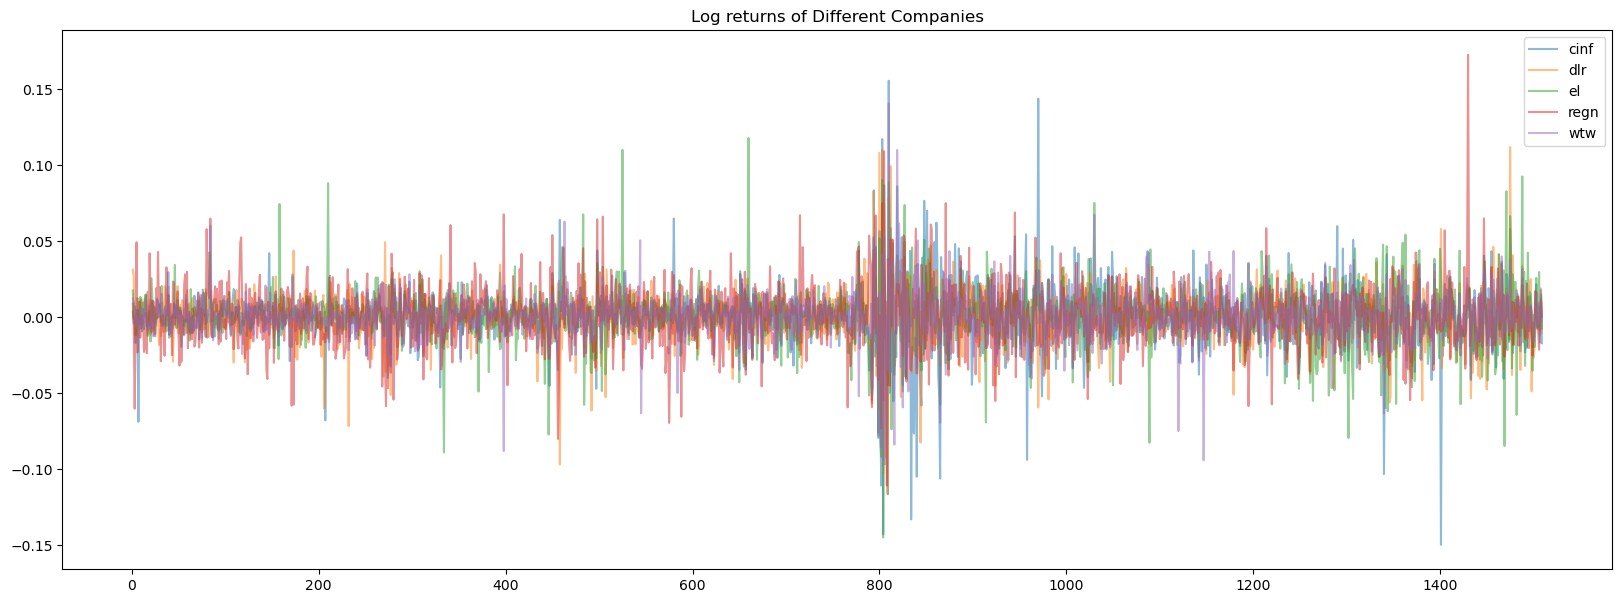

In [96]:
plt.subplots(1,1, figsize = (20,7))
for company, df in companies.items():
    df["Log return"].plot(alpha=0.5,label = company)
plt.title("Log returns of Different Companies")
plt.legend()

__B.__

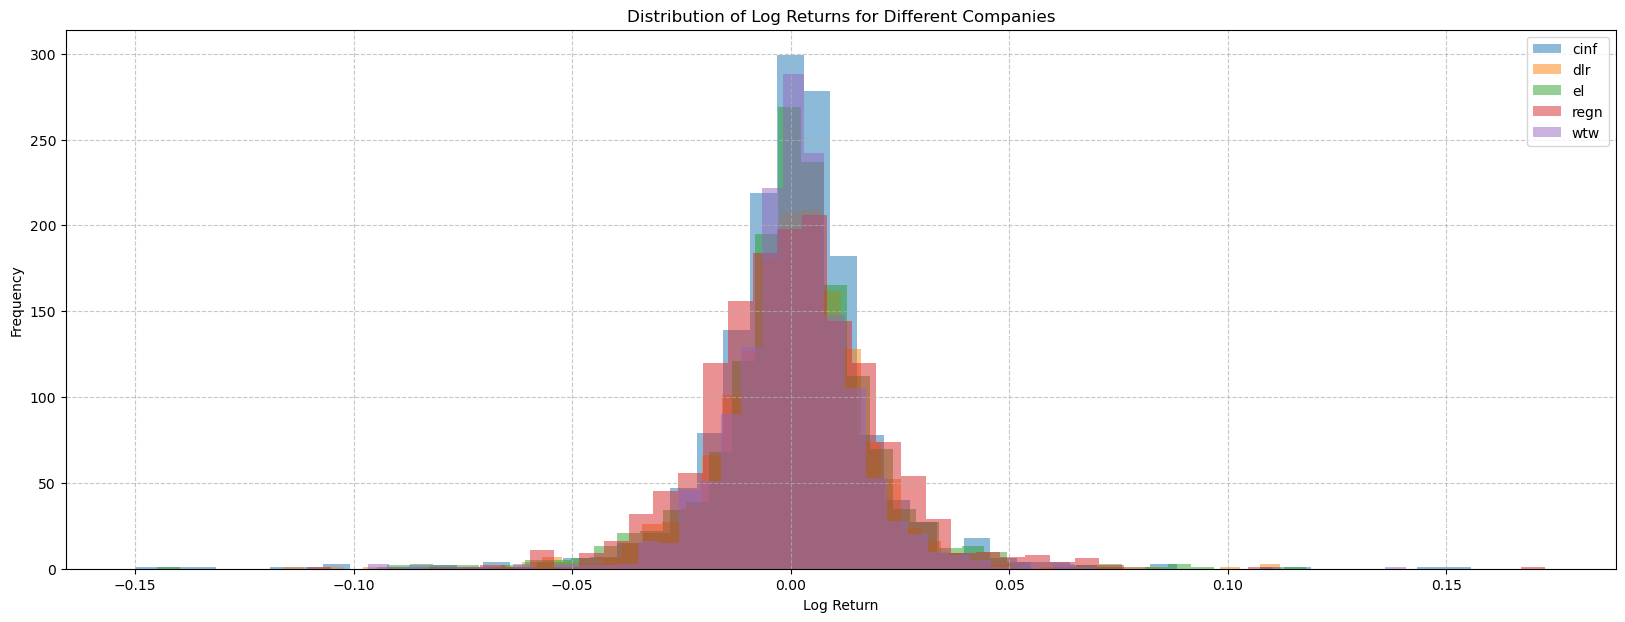

In [97]:
plt.subplots(1,1, figsize = (20,7))
for company, df in companies.items():
    df["Log return"].hist(bins=50, alpha=0.5,label = company)
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.title("Distribution of Log Returns for Different Companies")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

## Problem 2

In [104]:
#data = pd.read_csv("companies_no_subindustry.csv")
#data

or read directly from url:

In [102]:
import requests
import io

In [103]:
url = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
req = requests.get(url).content
data =pd.read_csv(io.StringIO(req.decode('utf-8')))
data.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


__2.1__

In [105]:
data["included"].isnull().sum()

45

45 comapnies do not filled-in the date of inclusion.

__2.2__

In [106]:
data = data[data.included.notnull()]
print(data["included"].isnull().sum())

0


In [107]:
data["included"] = pd.to_datetime(data["included"], dayfirst=True, errors='coerce')
print(data["included"].dtype)

datetime64[ns]


In [108]:
oldest = data[data["Founded"]==data["Founded"].min()]
youngest = data[data["Founded"]==data["Founded"].max()]

In [109]:
oldest

,Symbol,Security,GICS_Sector,hq,included,Founded
71,BK,BNY Mellon,Financials,"New York City, New York",1995-03-31,1784


In [110]:
youngest

,Symbol,Security,GICS_Sector,hq,included,Founded
481,WBD,Warner Bros. Discovery,Communication Services,"New York City, New York",2022-04-11,2022


To calculate the median age of a company, we need to adjust the "Founded" variable as some rows have values such as: '2013 (1888)' or '1904/1946/1959'. To proceed, we will keep only the first year that is mentioned.

In [112]:
data["Founded"] = data["Founded"].str.extract(r"(\d{4})")

In [113]:
year = datetime.datetime.today().year
data["Age"] = year - data["Founded"].astype(int)

median_age = data["Age"].median()
median_age


53.5

As we can see, the median age is 53.5.

__2.3__

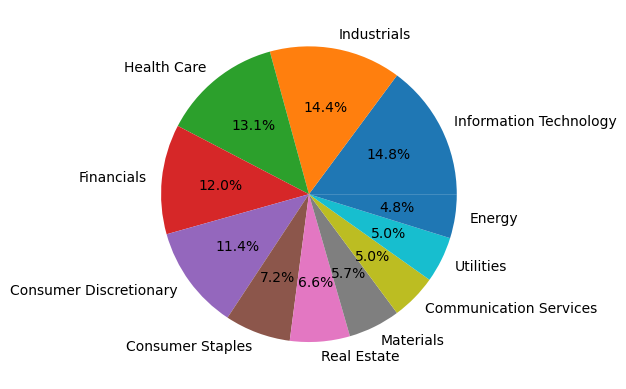

In [114]:
sector = data["GICS_Sector"].value_counts().reset_index()

plt.pie(sector["count"], labels= sector["GICS_Sector"], autopct = "%1.1f%%")
plt.show()

__2.4__

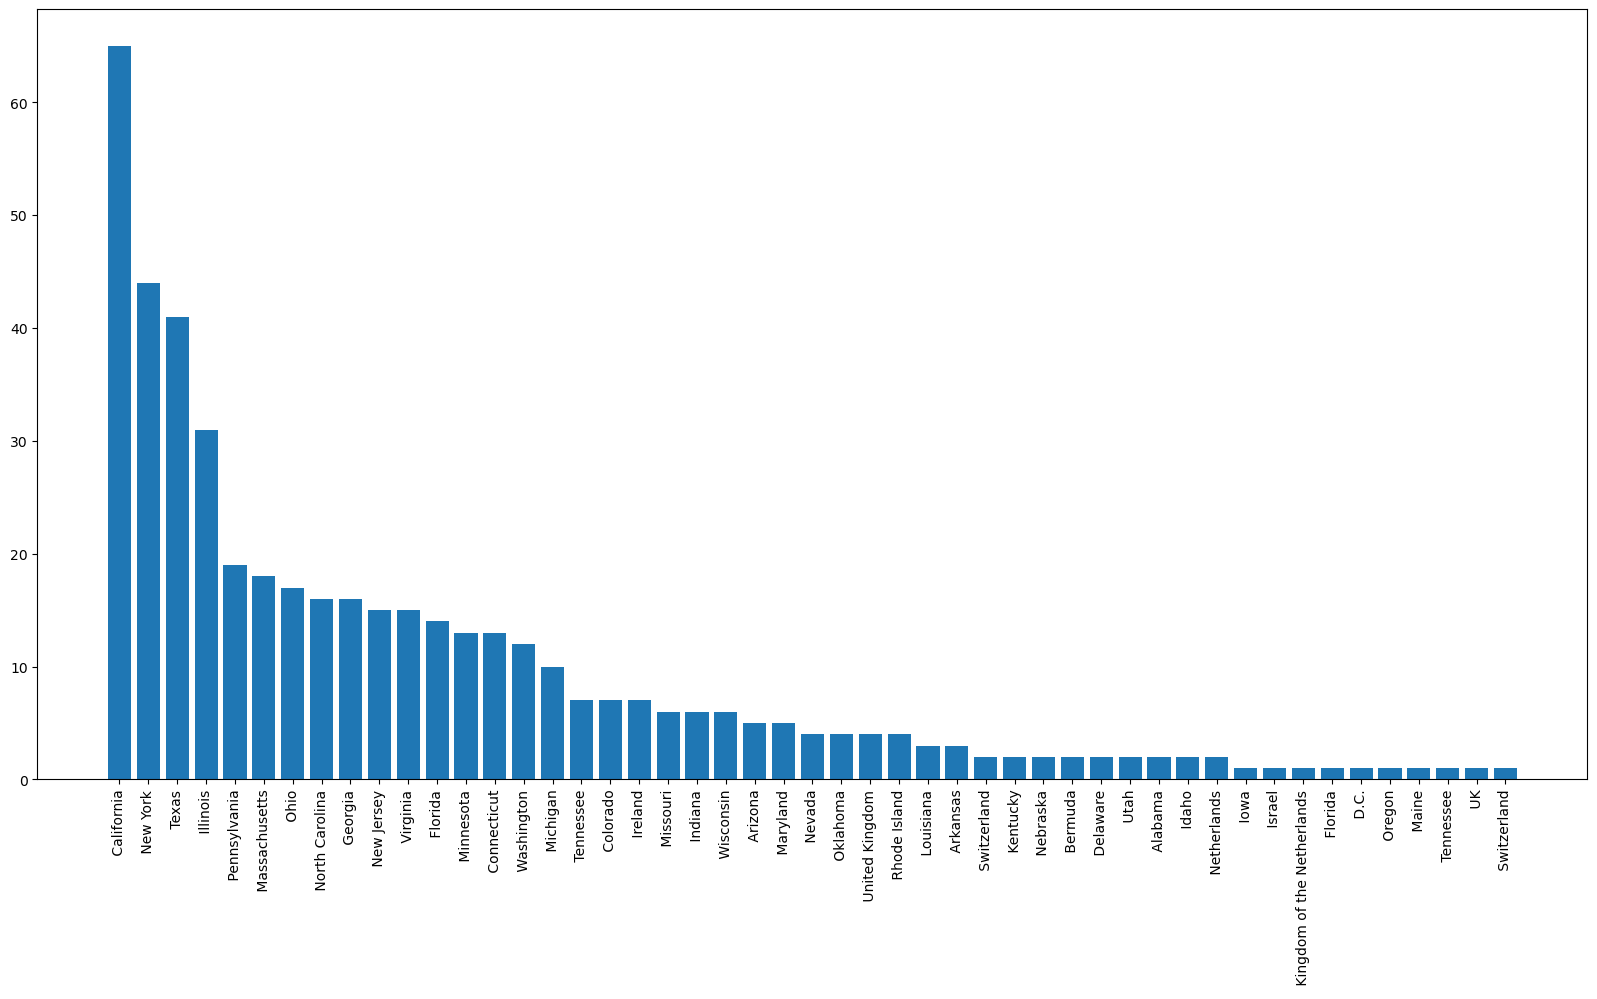

In [115]:
data["state"] = data["hq"].apply(lambda x: x.split(",")[-1])

states = data["state"].value_counts().reset_index()
plt.figure(figsize = (20,10))
plt.bar(states["state"], states["count"])
plt.xticks(rotation = 90)
plt.show()

The majority of companies are from California, followed by New York and Texas.

__2.5__

In [117]:
url2 = "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv"
data2 = pd.read_csv(url2)
data2

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment
...,...,...
498,YUM,Restaurants
499,ZBRA,Electronic Equipment & Instruments
500,ZBH,Health Care Equipment
501,ZION,Regional Banks


In [118]:
data

,Symbol,Security,GICS_Sector,hq,included,Founded,Age,state
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902,123,Minnesota
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916,109,Wisconsin
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888,137,Illinois
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013,12,Illinois
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981,44,Massachusetts
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",1997-10-06,1997,28,Kentucky
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",2019-12-23,1969,56,Illinois
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",2001-08-07,1927,98,Indiana
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",2001-06-22,1873,152,Utah


In [119]:
merged_data = data.merge(data2,on ="Symbol")

In [120]:
merged_data

,Symbol,Security,GICS_Sector,hq,included,Founded,Age,state,subindustry
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902,123,Minnesota,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916,109,Wisconsin,Building Products
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888,137,Illinois,Health Care Equipment
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013,12,Illinois,Pharmaceuticals
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981,44,Massachusetts,Health Care Equipment
...,...,...,...,...,...,...,...,...,...
453,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",1997-10-06,1997,28,Kentucky,Restaurants
454,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",2019-12-23,1969,56,Illinois,Electronic Equipment & Instruments
455,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",2001-08-07,1927,98,Indiana,Health Care Equipment
456,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",2001-06-22,1873,152,Utah,Regional Banks


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Health Care Equipment'),
  Text(1, 0, 'Pharmaceuticals'),
  Text(2, 0, 'Biotechnology'),
  Text(3, 0, 'Life Sciences Tools & Services'),
  Text(4, 0, 'Managed Health Care'),
  Text(5, 0, 'Health Care Supplies'),
  Text(6, 0, 'Health Care Distributors'),
  Text(7, 0, 'Health Care Services'),
  Text(8, 0, 'Health Care Facilities')])

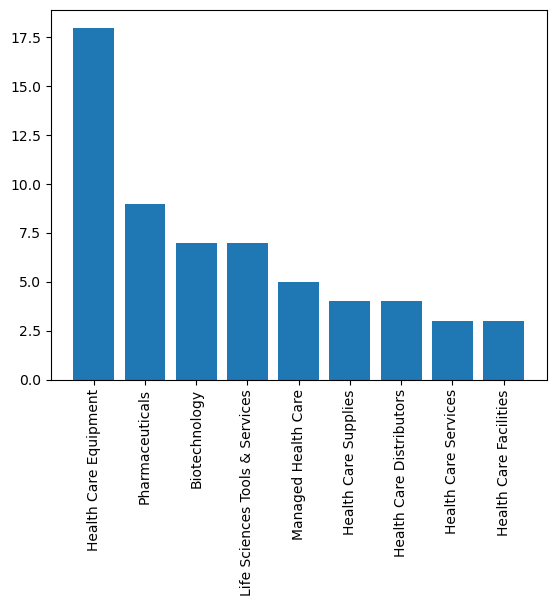

In [123]:
healthcare = merged_data.loc[merged_data["GICS_Sector"] == "Health Care", "subindustry"].value_counts().reset_index()
plt.bar(healthcare["subindustry"], healthcare["count"])
plt.xticks(rotation = 90)

## Problem 3

In [137]:
np.random.seed(1234)

# random (normal)
print(np.random.randn(4))

[ 0.47143516 -1.19097569  1.43270697 -0.3126519 ]


In [ ]:
#standard t
print(np.random.standard_t(4,4))

[-0.70403755  0.17341405 -0.50621085 -0.13958519]


In [ ]:
#uniform distribution
print(np.random.uniform(100, 500, 4))

[130.15249666 247.5296024  473.25604079 360.55125729]


In [141]:
#exponential
print(np.random.exponential(4,4))


[12.69363649  8.34772237  1.77152956  2.78055766]
